# KNN Classification Project


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.dpi'] = 150

## Loading the DataSet:

In [4]:
df = pd.read_csv('DATA')

In [5]:
df.head(10)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
5,1587.993461,667.420121,2072.048544,364.624958,905.011385,2229.178514,880.442566,568.698408,645.719217,2156.949990,1
6,1497.293624,822.435853,908.059366,671.797517,1280.270442,1910.066313,1052.812386,713.757499,703.951632,1088.493788,0
7,1172.820769,1166.958461,455.656588,445.572745,1109.894585,1045.551452,1301.821786,264.940137,945.023932,2307.922229,0
8,839.494647,1089.747059,653.699894,659.334590,1529.725972,1521.320489,1401.676227,433.025043,1289.063583,1690.149835,0
9,1028.689140,202.089774,1030.841860,429.109102,943.104815,1978.506855,653.178512,753.655291,1336.375960,1057.864848,1


In [6]:
#Dropping the 'TARGET CLASS' Feature:

db = df.drop('TARGET CLASS', axis = 1)
db.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792


# Standardize the Variables:

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(db)

StandardScaler()

In [11]:
scaled = scaler.transform(db)

In [12]:
db_scaled = pd.DataFrame(data = scaled, columns = db.columns )

db_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split:

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = db_scaled
y= df['TARGET CLASS']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 101)

# Using KNN:

In [18]:
from sklearn.neighbors import KNeighborsClassifier

**Creating a KNN model instance with n_neighbors=1**

In [20]:
knn = KNeighborsClassifier(n_neighbors = 1)

**Fitting the KNN Model to the training data.**

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations:

**Predictions with n_neighbors = 1:**

In [25]:
pred_1 = knn.predict(x_test)

**Evaluation:**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print('CONFUSION MATRIX: \n')
print(confusion_matrix(y_test, pred_1))

CONFUSION MATRIX: 

[[115  47]
 [ 48 120]]


In [29]:
print('CLASSIFICATION REPORT: \n')
print(classification_report(y_test, pred_1))

CLASSIFICATION REPORT: 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       162
           1       0.72      0.71      0.72       168

    accuracy                           0.71       330
   macro avg       0.71      0.71      0.71       330
weighted avg       0.71      0.71      0.71       330



# Choosing a K Value
**Using the elbow method to pick a good K Value!**

In [31]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)

    error_rate.append(np.mean(y_test != pred_i))

**K Value vs Error Rate plot:**

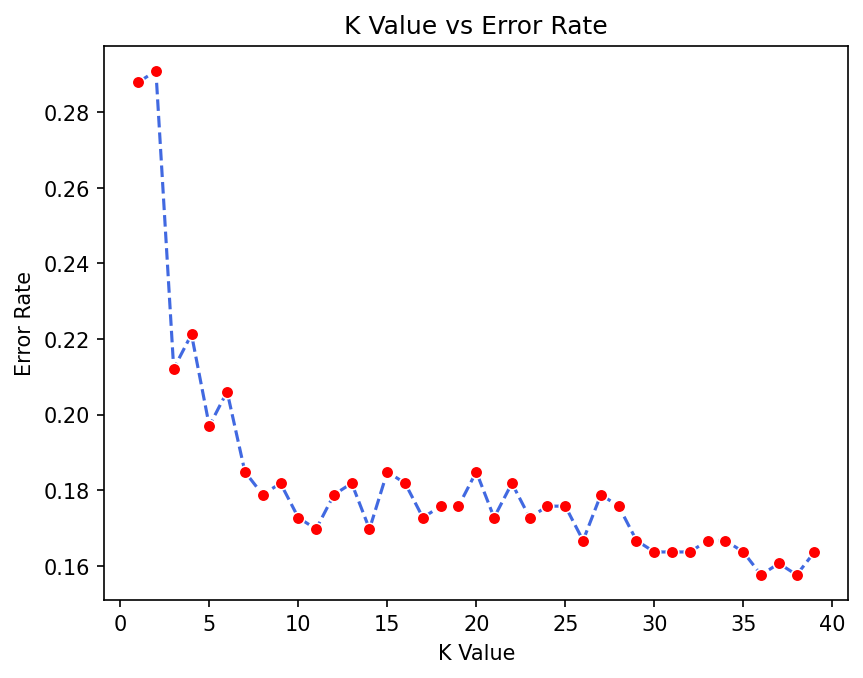

In [33]:
sns.lineplot(x = range(1,40), y = error_rate, color = 'royalblue', marker = 'o', markerfacecolor = 'red', ls = '--' )
plt.title('K Value vs Error Rate')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

plt.show()

## Retrain with new K Value

**Retraining the model with the best K values and again analyzing the classification report and the confusion matrix.**

In [35]:
#For K = 30:

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train,y_train)
pred_30 = knn.predict(x_test)

print('CONFUSION MATRIX:')
print(confusion_matrix(y_test, pred_30))
print('\n')
print('CLASSIFICATION REPORT:')
print(classification_report(y_test, pred_30))

CONFUSION MATRIX:
[[135  27]
 [ 27 141]]


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       162
           1       0.84      0.84      0.84       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



In [36]:
#For K = 36:

knn = KNeighborsClassifier(n_neighbors = 36)
knn.fit(x_train, y_train)
pred_36 = knn.predict(x_test)

print('CONFUSION MATRIX:')
print(confusion_matrix(y_test, pred_36))
print('\n')
print('CLASSIFICATION MATRIX:')
print(classification_report(y_test , pred_36))

CONFUSION MATRIX:
[[136  26]
 [ 26 142]]


CLASSIFICATION MATRIX:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       162
           1       0.85      0.85      0.85       168

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330



---
# END